# Explore here

# **PREDICIENDO LA DIABETES**

Importación de las librerías necesarias

In [1]:
# Your code here
# Librería para la declaración y uso de Data Frames:
import pandas as pd

# Librería para realizar operaciones matemáticas: 
import numpy as np

# Librería para visualizar datos estadísticos: 
import seaborn as sns

# Librería para trazar gráficos:
import matplotlib.pyplot as plt

## **Paso 1. Lectura de datos.**

Lo primero que haremos será leer y guardar en una variable la información para trabajar con ella.

Para ello se guarda el archivo con los datos en la ruta: https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv   y se carga en un DataFrame.

In [3]:
# Importamos el archivo:
data = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

# Se muestran las primeras filas del DataFrame:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnacies: Número de embarazos del paciente (numérico)
- Glucose: Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)
- BloodPressure:  Presión arterial diastólica (medida en mm Hg) (numérico)
- SkinThickness: Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)
- Insulin: Insulina sérica de 2 horas (medida en mu U/ml) (numérico)
- BMI: Índice de masa corporal (numérico)
- DiabetesPedigreeFunction: Función de pedigrí de diabetes (numérico)
- Age: Edad del paciente (numérico)
- Outcome: Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

## **Paso 2 Exploración y limpieza de datos**

### **Paso 2.1 Comprensión de las características.**

In [5]:
# Recurrimos as atributo shape para describir la información que contiene:
print(f"El conjunto de datos cunta con información a cerca de {data.shape[0]} pacientes, a través de {data.shape[1]} características específicas de cada uno.")

El conjunto de datos cunta con información a cerca de 768 pacientes, a través de 9 características específicas de cada uno.


### **Paso 2.2 Identificación de valores duplicados o nulos**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- También sabemos que no existen valores nulos en la totalidad del conjunto.
- Y que de las 9 características nombradas anterioremente todas son numéricas.

In [7]:
# Visulización de valores duplicados.
print(f"Hay un total de {data.duplicated().sum()} valores duplicados.")

Hay un total de 0 valores duplicados.


## **Paso 3. Análisis univariado.**

### **Paso 3.1 Análisis de variables categóricas**

En este caso no existen variables categóricas.

### **Paso 3.2 Análisis de variables numéricas.**

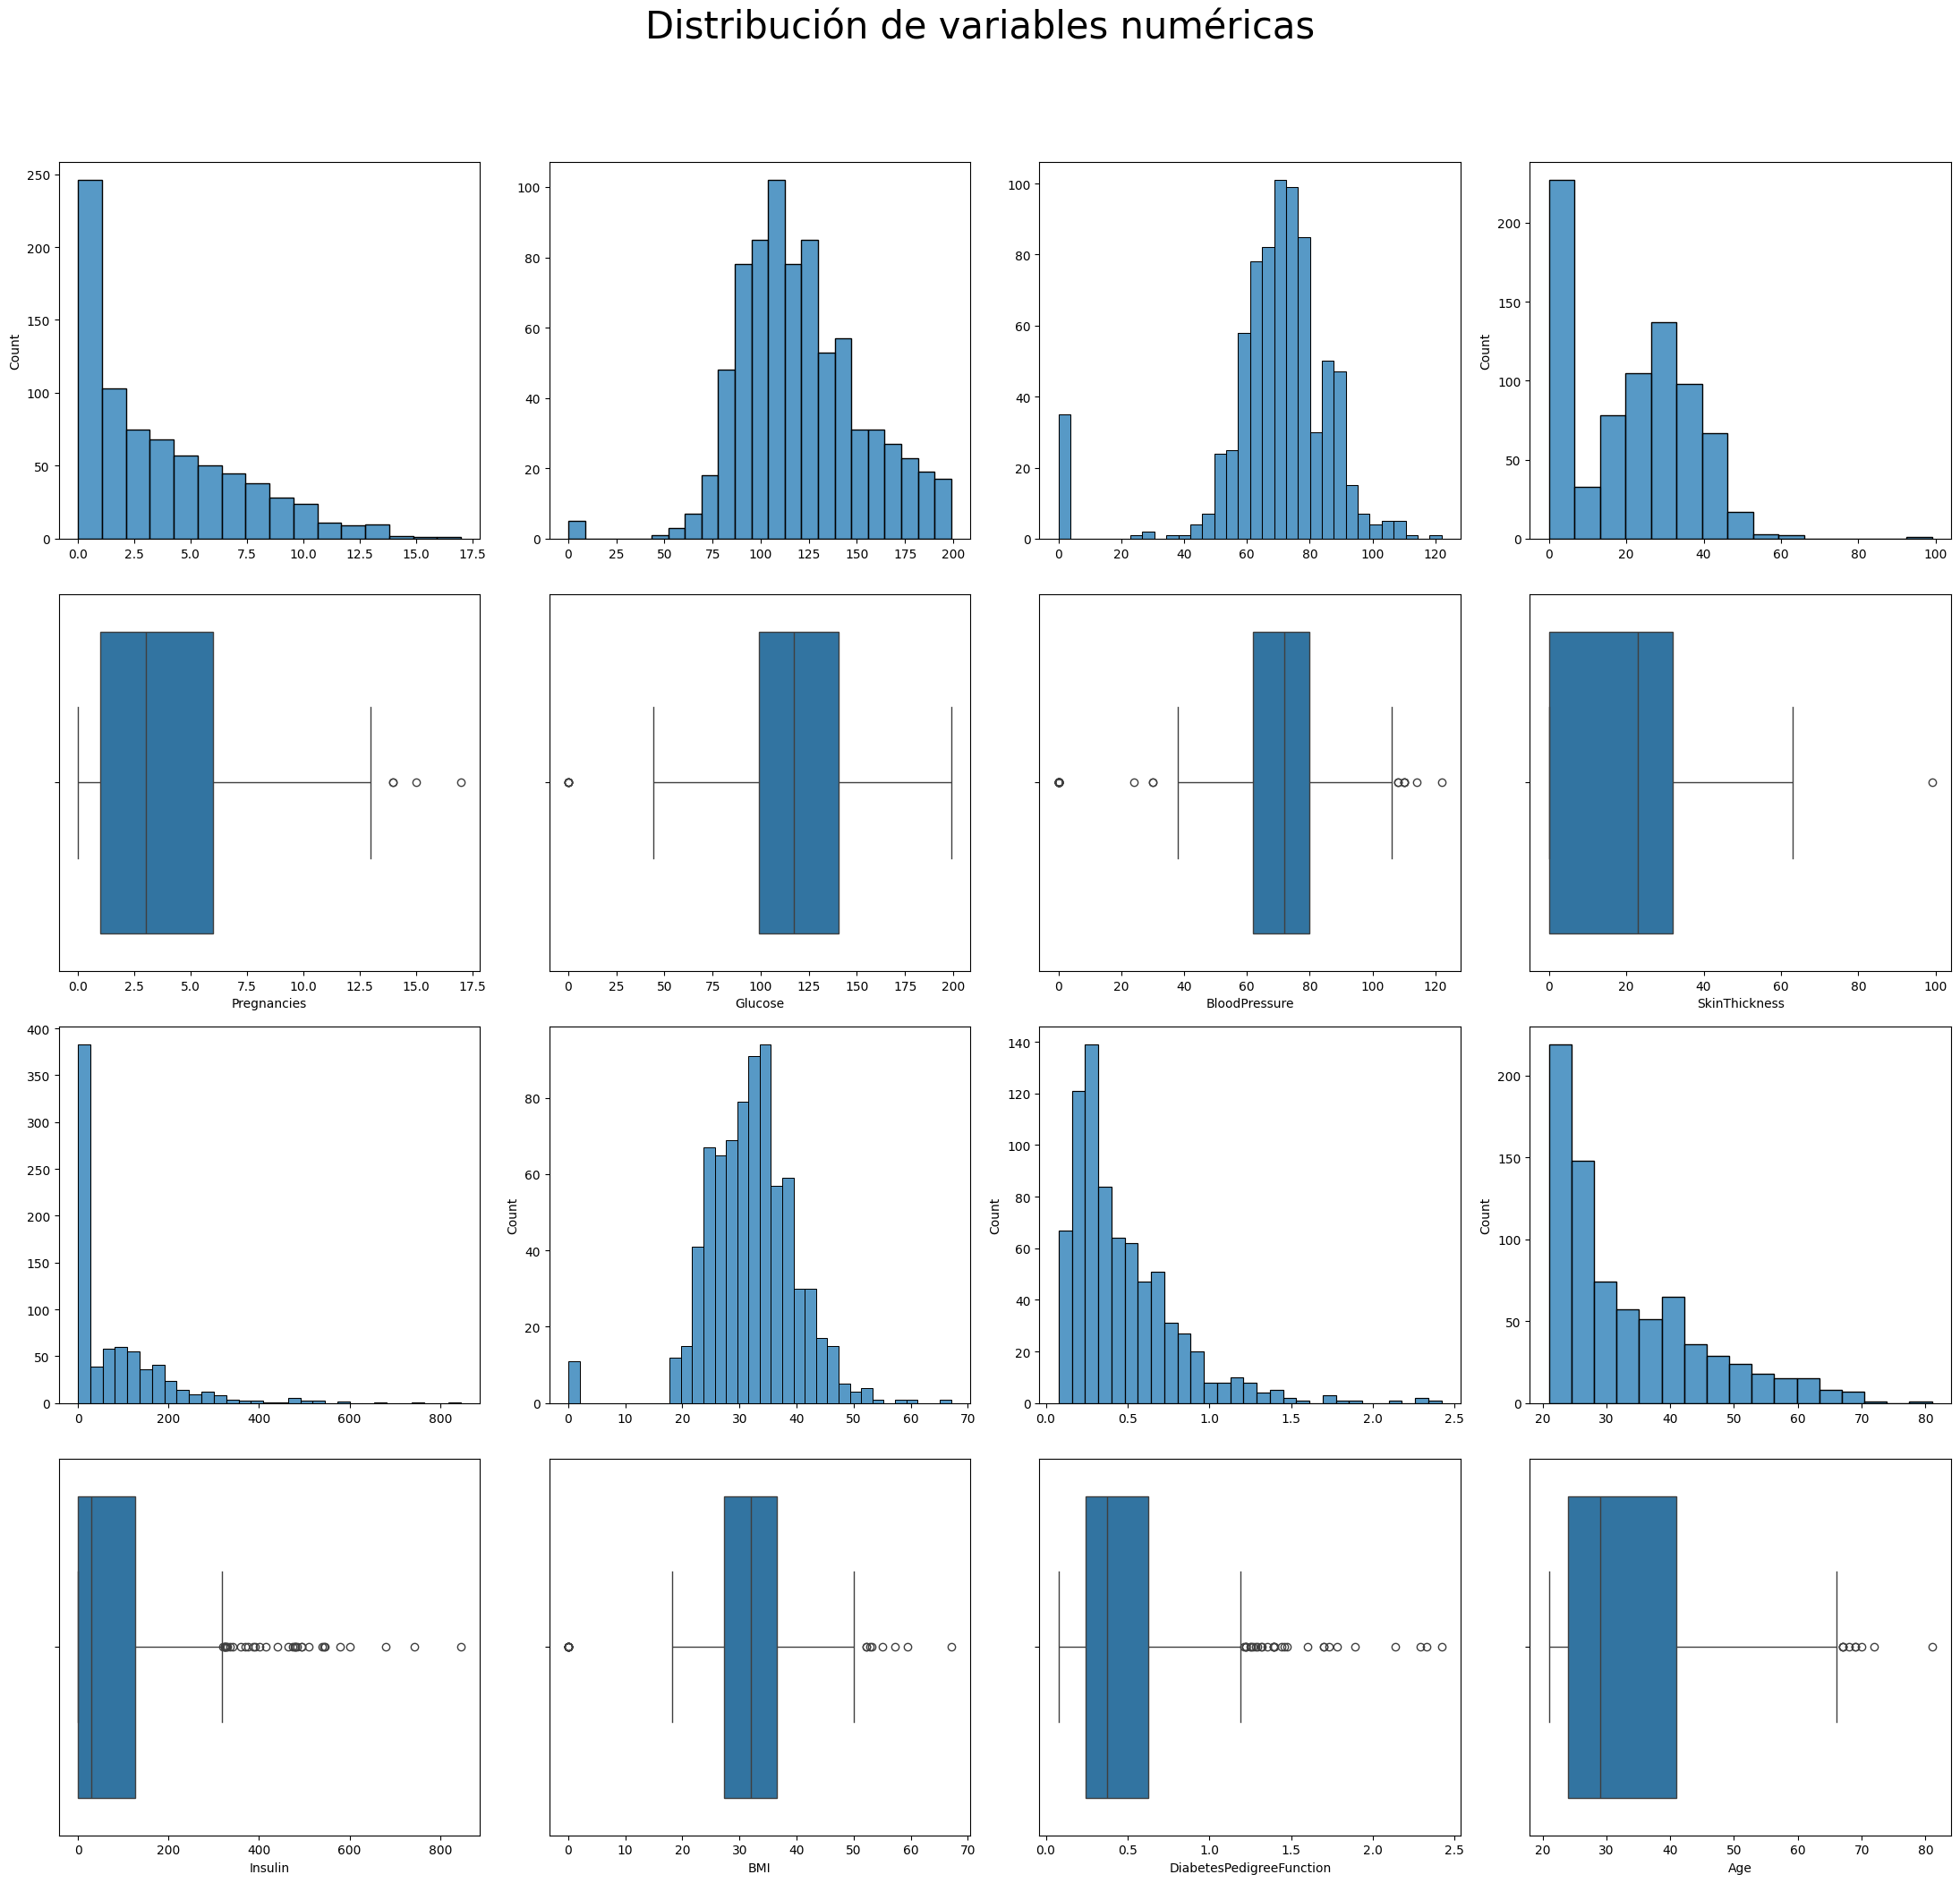

In [ ]:
# Creamos la figura para los histogramas y diagramas de caja
fig, axis = plt.subplots(4, 4, figsize=(22,20))

# Título global al conjunto
fig.suptitle("Distribución de variables numéricas", fontsize=30, y=1.05)

# Histogramas y diagramas de caja
sns.histplot(ax=axis[0, 0], data=data, x="Pregnancies").set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=data, x="Pregnancies")
sns.histplot(ax=axis[0, 1], data=data, x="Glucose").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=data, x="Glucose")
sns.histplot(ax=axis[0, 2], data=data, x="BloodPressure").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 2], data=data, x="BloodPressure")
sns.histplot(ax=axis[0, 3], data=data, x="SkinThickness").set(xlabel=None)
sns.boxplot(ax=axis[1, 3], data=data, x="SkinThickness")
sns.histplot(ax=axis[2, 0], data=data, x="Insulin").set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[3, 0], data=data, x="Insulin")
sns.histplot(ax=axis[2, 1], data=data, x="BMI").set(xlabel=None)
sns.boxplot(ax=axis[3, 1], data=data, x="BMI")
sns.histplot(ax=axis[2, 2], data=data, x="DiabetesPedigreeFunction").set(xlabel=None)
sns.boxplot(ax=axis[3, 2], data=data, x="DiabetesPedigreeFunction")
sns.histplot(ax=axis[2, 3], data=data, x="Age").set(xlabel=None)
sns.boxplot(ax=axis[3, 3], data=data, x="Age")

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Análisis de la variable objetivo

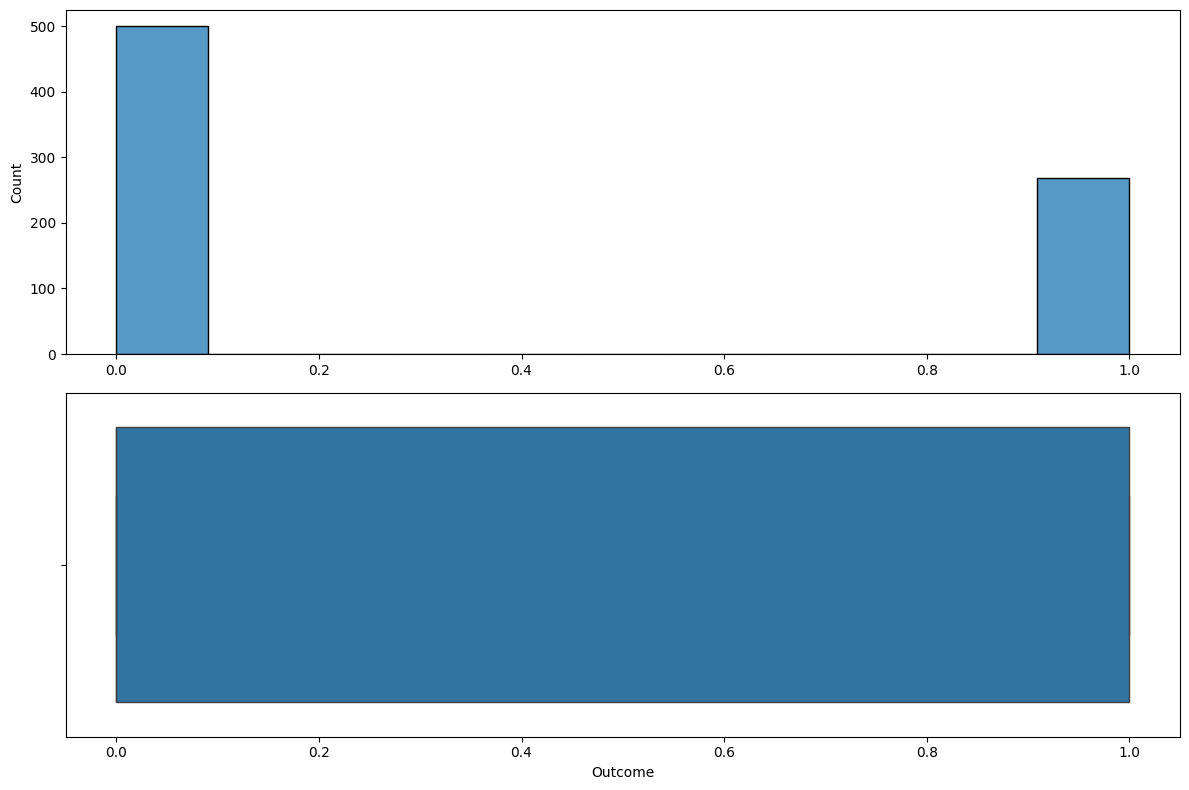

In [ ]:
# Crear la figura con 2 subplots en una columna
fig, axis = plt.subplots(2, 1, figsize=(12, 8))

# Histograma y diagrama de caja
sns.histplot(ax=axis[0], data=data, x="Outcome").set(xlabel=None)
sns.boxplot(ax=axis[1], data=data, x="Outcome")

# Ajustar el diseño y mostrar la gráfica
plt.tight_layout()
plt.show()